In [1]:
import numpy as np
import pandas as pd
from scipy.fft import fft, ifft
import cmath

# from processing_func import from_S_to_T, from_T_to_S
# from file_opener import run

In [2]:
%matplotlib widget
import matplotlib.pyplot as plt

In [3]:
###de_embadding = False # указать, нужен или не нужен
time_gating = True # указать, нужен или не нужен

### Импорт сырых данных из .s2p файла и перевод их в комплексные числа

In [4]:
data_object_1 = pd.read_csv('C:\\Users\\isvoropaev\Desktop\\python_codes\\post_processing_RIS\\20sept\\struct_minus1V.s2p', 
                            sep=' ', header=None, skiprows=5, skipinitialspace=True, index_col=False,
                names=['Frequency', 'ReS11', 'ImS11', 'ReS21', 'ImS21', 'ReS12', 'ImS12', 'ReS22', 'ImS22'])

data_object_2 = pd.read_csv('C:\\Users\\isvoropaev\Desktop\\python_codes\\post_processing_RIS\\20sept\\struct_5A.s2p', 
                            sep=' ', header=None, skiprows=5, skipinitialspace=True, index_col=False,
                names=['Frequency', 'ReS11', 'ImS11', 'ReS21', 'ImS21', 'ReS12', 'ImS12', 'ReS22', 'ImS22'])

data_screen = pd.read_csv('C:\\Users\\isvoropaev\\Desktop\\python_codes\\post_processing_RIS\\20sept\\screen.s2p', 
                          sep=' ', header=None, skiprows=5, skipinitialspace=True, index_col=False,
                names=['Frequency', 'ReS11', 'ImS11', 'ReS21', 'ImS21', 'ReS12', 'ImS12', 'ReS22', 'ImS22'])

data_free = pd.read_csv('C:\\Users\\isvoropaev\\Desktop\\python_codes\\post_processing_RIS\\20sept\\free.s2p', 
                        sep=' ', header=None, skiprows=5, skipinitialspace=True, index_col=False,
                names=['Frequency', 'ReS11', 'ImS11', 'ReS21', 'ImS21', 'ReS12', 'ImS12', 'ReS22', 'ImS22'])

In [5]:
data_object_2.head() # Смотрим корректность импорта данных

,Frequency,ReS11,ImS11,ReS21,ImS21,ReS12,ImS12,ReS22,ImS22
0,2.000000e+10,-0.195550,-0.246286,-0.009253,-0.008983,-0.011799,-0.005394,0.145516,0.017178
1,2.000200e+10,-0.189117,-0.241099,-0.009804,-0.007954,-0.012474,-0.005371,0.142801,0.028339
2,2.000400e+10,-0.182785,-0.232133,-0.010145,-0.007024,-0.012067,-0.004210,0.140672,0.027012
3,2.000600e+10,-0.174649,-0.220860,-0.010472,-0.006277,-0.012151,-0.002827,0.133947,0.030562
4,2.000800e+10,-0.165443,-0.205959,-0.010929,-0.005357,-0.011467,-0.002401,0.131503,0.032336


Перевод данных в вид комплексных чисел

In [6]:
for dataset in [data_object_1, data_object_2, data_screen, data_free]: # это массив из указателей на соответствующие
    dataset['s11']=dataset['ReS11']+1j*dataset['ImS11']
    dataset['s21']=dataset['ReS21']+1j*dataset['ImS21']
    dataset['s12']=dataset['ReS12']+1j*dataset['ImS12']
    dataset['s22']=dataset['ReS22']+1j*dataset['ImS22']

Удаление исходных колонок

In [7]:
data_object_1 = data_object_1.drop(['ReS11', 'ImS11', 'ReS21', 'ImS21', 'ReS12', 'ImS12', 'ReS22', 'ImS22'], axis=1)
data_object_2 = data_object_2.drop(['ReS11', 'ImS11', 'ReS21', 'ImS21', 'ReS12', 'ImS12', 'ReS22', 'ImS22'], axis=1)
data_screen = data_screen.drop(['ReS11', 'ImS11', 'ReS21', 'ImS21', 'ReS12', 'ImS12', 'ReS22', 'ImS22'], axis=1)
data_free = data_free.drop(['ReS11', 'ImS11', 'ReS21', 'ImS21', 'ReS12', 'ImS12', 'ReS22', 'ImS22'], axis=1)

In [8]:
data_object_2.head() # просмотр нового датасета

,Frequency,s11,s21,s12,s22
0,2.000000e+10,-0.195550-0.246286j,-0.009253-0.008983j,-0.011799-0.005394j,0.145516+0.017178j
1,2.000200e+10,-0.189117-0.241099j,-0.009804-0.007954j,-0.012474-0.005371j,0.142801+0.028339j
2,2.000400e+10,-0.182785-0.232133j,-0.010145-0.007024j,-0.012067-0.004210j,0.140672+0.027012j
3,2.000600e+10,-0.174649-0.220860j,-0.010472-0.006277j,-0.012151-0.002827j,0.133947+0.030562j
4,2.000800e+10,-0.165443-0.205959j,-0.010929-0.005357j,-0.011467-0.002401j,0.131503+0.032336j


Создаем переменные, с которыми будем непосредственно работать (массивы формата `pd.Series`)

In [21]:
frequency = data_object_1['Frequency']

s21_object_zero = data_object_1['s21']

s21_object_one = data_object_2['s21']

s21_screen = data_screen['s21']

s21_free = data_free['s21']

### Предпросмотр графиков необработанных файлов

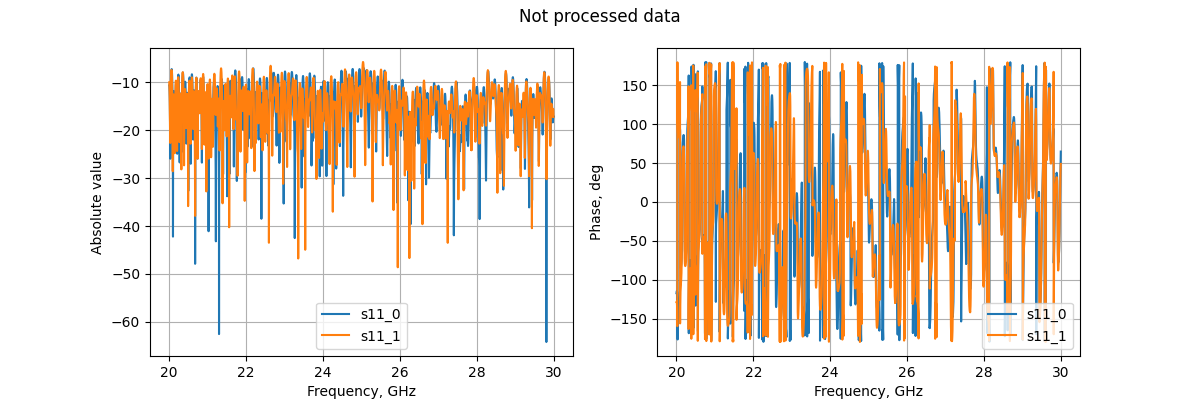

In [10]:
s_par = ['s11'] # Вести сюда названия S-параметров, которые нужны на графике в формате 'sij'
data = [data_object_1, data_object_2] # Ввести сюда какие измерения нужны


'''Дальше  не трогать!!!'''
fig = plt.figure(figsize=(12,4))

ax_1 = fig.add_subplot(121)
ax_2 = fig.add_subplot(122)
for i, dataset in enumerate(data):
    for elem in s_par:
        ax_1.plot(dataset['Frequency']*1e-9, 20*np.log10(dataset[elem].apply(abs).to_numpy()), label=elem+'_'+str(i))
        ax_2.plot(dataset['Frequency']*1e-9, np.degrees(dataset[elem].apply(cmath.phase)), label=elem+'_'+str(i))

ax_1.set_xlabel("Frequency, GHz")
ax_1.set_ylabel("Absolute value")
ax_1.legend()
ax_1.grid()

ax_2.set_xlabel("Frequency, GHz")
ax_2.set_ylabel("Phase, deg")
ax_2.legend()
ax_2.grid()


fig.suptitle('Not processed data')
#plt.tight_layout()
plt.show()

### Time-Gating

In [11]:
N_fft = 2 ** 22 # количиство точек во временной области
# Должно иметь степень двойки для большей скорости и быть большем, чем количество частотных точек
T_max = 1 / (frequency[1]-frequency[0]) # продолжительность измеряемого импульса, определяется из количества измеряемых частотных точек
print(T_max)

4.998999999987752e-07


In [12]:
time = T_max*np.linspace(0, 1 + T_max, N_fft) # набор точек во временной области
time[-1] # последний элемент

4.999002498987852e-07

Просмотр S-параметров во временной области

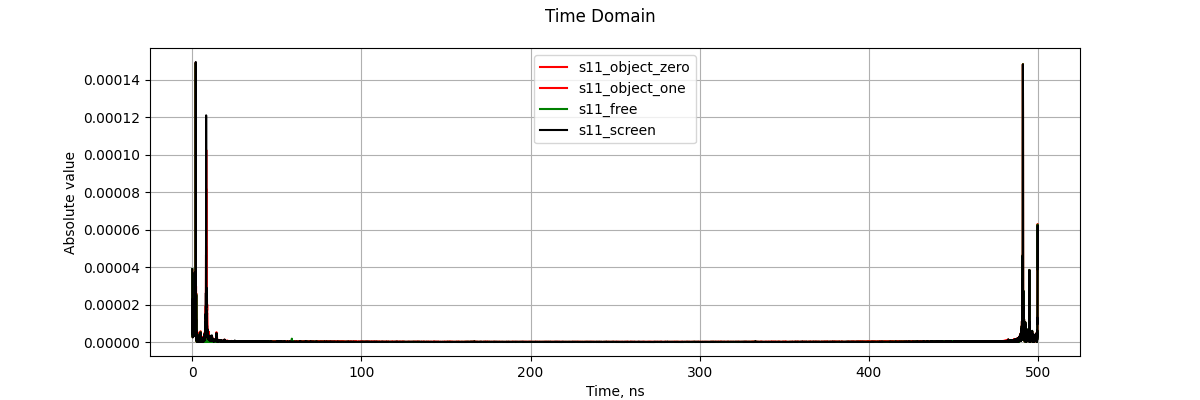

In [13]:
fig2 = plt.figure(figsize=(12,4))

ax_1 = fig2.add_subplot(111)
ax_1.plot(time*1e9, abs(ifft(s11_object_zero.to_numpy(), n=N_fft)),'r', label='s11_object_zero')
ax_1.plot(time*1e9, abs(ifft(s11_object_one.to_numpy(), n=N_fft)),'r', label='s11_object_one')
ax_1.plot(time*1e9, abs(ifft(s11_free.to_numpy(), n=N_fft)),'g', label='s11_free')
ax_1.plot(time*1e9, abs(ifft(s11_screen.to_numpy(), n=N_fft)),'k', label='s11_screen')

ax_1.set_xlabel("Time, ns")
ax_1.set_ylabel("Absolute value")
ax_1.legend()
ax_1.grid()


fig2.suptitle('Time Domain')
plt.show()

In [14]:
gate_s11 = np.array([[0, 7], [10, 900]])*1e-9 # заполнить промежутками времени, которые необходимо вырезать в нс

In [15]:
def time_gate_s_param(gate: np.ndarray, s_par: pd.core.series.Series, n=N_fft, time=time):
    s = s_par.to_numpy()
    time_dom_s = pd.Series(ifft(s, n=n))
    for k in range(gate.shape[0]):
        if len(gate[k, :]) != 0:
            numbers = (time >= gate[k, 0]) & (time <= gate[k, 1])
            time_dom_s.loc[numbers] = 0
            #print(time_dom_s.head())
    s_new = fft(time_dom_s.to_numpy())
    s_new = s_new[0:len(frequency)]
    return pd.Series(s_new)

Проведение тайм-гейтинга

In [16]:
if time_gating == True:
    s11_object_zero = time_gate_s_param(gate=gate_s11, s_par=s11_object_zero)
    s11_object_one = time_gate_s_param(gate=gate_s11, s_par=s11_object_one)
    s11_screen = time_gate_s_param(gate=gate_s11, s_par=s11_screen)
    s11_free = time_gate_s_param(gate=gate_s11, s_par=s11_free)

In [17]:
s11_object_one.shape # проверка, что число точек осталось таким же, как в исходных данных

(5000,)

Просмотр S-параметров после тайм-гейтинга

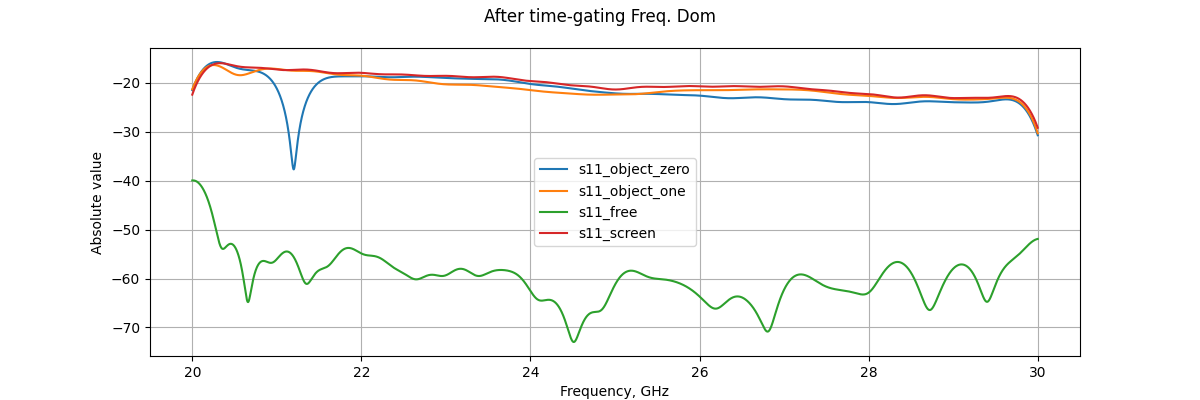

In [18]:
param = [s11_object_zero, s11_object_one, s11_free, s11_screen]
name = ['s11_object_zero', 's11_object_one', 's11_free', 's11_screen']

fig3 = plt.figure(figsize=(12,4))

ax_1 = fig3.add_subplot(111)

for i, s_par in enumerate(param):
    ax_1.plot(frequency*1e-9, 20*np.log10(s_par.apply(abs).to_numpy()), label=name[i])
ax_1.set_xlabel("Frequency, GHz")
ax_1.set_ylabel("Absolute value")
ax_1.legend()
ax_1.grid()


fig3.suptitle('After time-gating Freq. Dom')
plt.show()

### Итоговые выражения для коэффициента отражения

In [19]:
Gamma_zero = -(s11_object_zero - s11_free) / (s11_screen - s11_free)
Gamma_one = -(s11_object_one - s11_free) / (s11_screen - s11_free)

### Импорт графиков из CST

In [20]:
reflecting_coef_30deg_TE = pd.read_csv('ND_struct_0deg_s11_TE.txt', sep='\t', header=None, skiprows=3, 
                names=['Frequency', 'ReSz11', 'ImSz11'])

FileNotFoundError: [Errno 2] No such file or directory: 'ND_struct_0deg_s11_TE.txt'

In [ ]:
reflecting_coef_30deg_TE['Sz11'] = reflecting_coef_30deg_TE['ReSz11'] + 1j*reflecting_coef_30deg_TE['ImSz11']

In [ ]:
reflecting_coef_30deg_TE = reflecting_coef_30deg_TE.drop(['ReSz11', 'ImSz11'], axis=1)

In [ ]:
reflecting_coef_30deg_TE.head()

In [ ]:
cst_freq = reflecting_coef_30deg_TE['Frequency']
cst_Gamma = reflecting_coef_30deg_TE['Sz11']

### Сравенние графиков с результатами CST

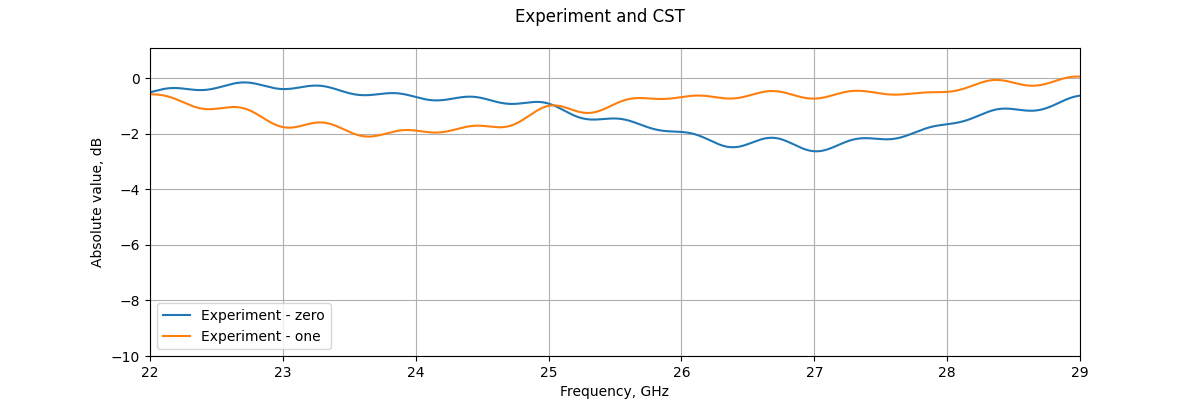

In [ ]:
fig4 = plt.figure(figsize=(12,4))

ax_1 = fig4.add_subplot(111)

ax_1.plot(frequency*1e-9, 20*np.log10(Gamma_zero.apply(abs).to_numpy()), label='Experiment - zero')
ax_1.plot(frequency*1e-9, 20*np.log10(Gamma_one.apply(abs).to_numpy()), label='Experiment - one')
#ax_1.plot(cst_freq, 20*np.log10(cst_Gamma.apply(abs).to_numpy()), label='Modeling')
ax_1.set_xlabel("Frequency, GHz")
ax_1.set_ylabel("Absolute value, dB")
ax_1.set_xlim(left=22, right=29)
ax_1.set_ylim(bottom=-10)
ax_1.legend()
ax_1.grid()


fig4.suptitle('Experiment and CST')
plt.show()

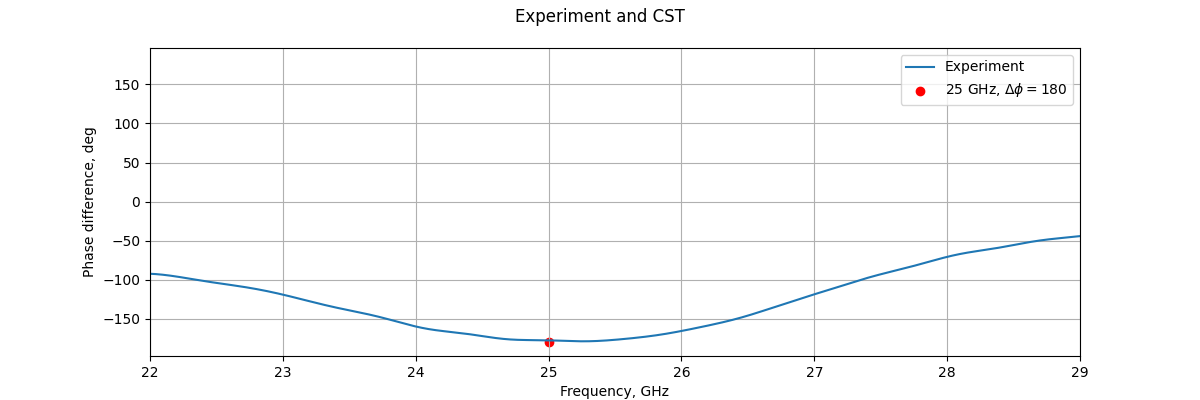

In [ ]:
fig4 = plt.figure(figsize=(12,4))

ax_1 = fig4.add_subplot(111)

ax_1.plot(frequency*1e-9, np.degrees(pd.Series(Gamma_one / Gamma_zero).apply(cmath.phase).to_numpy()), label='Experiment')
ax_1.scatter([25], [-180], color='r', label = r'25 GHz, $\Delta\phi = 180$')
#ax_1.plot(cst_freq, np.degrees(cst_Gamma.apply(cmath.phase).to_numpy()), label='Modeling')
ax_1.set_xlabel("Frequency, GHz")
ax_1.set_ylabel("Phase difference, deg")
ax_1.set_xlim(left=22, right=29)
ax_1.legend()
ax_1.grid()


fig4.suptitle('Experiment and CST')
plt.show()